# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `liar.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

- *Your names here*

In [46]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_liar_dataset():
    import string
    
    with open('liar.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_liar_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')

Sample:
real: ['thanks', 'to', 'our', 'reforms', 'the', 'average', 'family', 'will', 'have', 'an', 'extra', '322', 'to', 'spend']
real: ['winning', 'enough', 'pledged', 'delegates', 'is', 'not', 'impossible']


## Task 2: Fake News Classification with Naive Bayes

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is fake or real (not fake).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'fake'` and `'real'`.

Fill out the methods in `NaiveBayesFakeNewsClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [47]:
from collections import Counter, defaultdict
from math import log

# Implement your solution here.
class NaiveBayesFakeNewsClassifier(object):
    def __init__(self):
        self.total_docs = None
        self.classes = None
        self.docs_per_class = None
        self.vocabulary = None
        self.vocabulary_size = None
        self.collection_frequency = None
    
    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'Fake' or the string 'real'.
        """
        self.total_docs = len(X)
        self.classes = set(y)
        self.docs_per_class = Counter(y)
        self.vocabulary = set(term for document in X for term in document)
        self.vocabulary_size = len(self.vocabulary)
        self.collection_frequency = defaultdict(int)
        self.total_terms_per_class = defaultdict(int)
        for document, class_label in zip(X, y):
            for term in document:
                self.collection_frequency[(term, class_label)] += 1
                self.total_terms_per_class[class_label] += 1
    
    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('fake' or 'real').
        """
        yhat = []
        for document in X:
            term_frequency = Counter(document)
            class_likelihood = dict()
            for ci in self.classes:
                # We compute the log-likelihood.
                # According to logarithm laws, the products are mapped to sums and the exponent is mapped to a multiplication.
                prior = log(self.docs_per_class[ci] / self.total_docs)
                
                class_likelihood[ci] = prior + \
                    sum(
                        term_frequency[tj] * log(  
                            (self.collection_frequency[(tj, ci)] + 1) /
                            (self.total_terms_per_class[ci] + self.vocabulary_size)
                    ) for tj in term_frequency)
                
            # Choose class label with highest log-likelihood.
            yhat.append(max(class_likelihood.items(), key=lambda t: t[1])[0])
        return yhat


/Users/akram/PycharmProjects/untitled/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/akram/PycharmProjects/untitled/venv/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


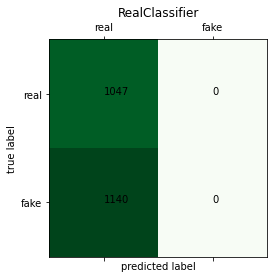

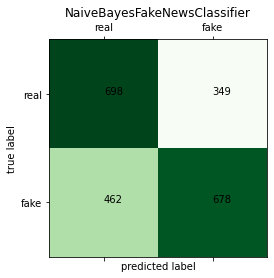

In [48]:
# The following code will evaluate your classifier.
class RealClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['real']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['real', 'fake'])
        
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'real', 'fake'])
    ax.set_yticklabels(['', 'real', 'fake'])
    ax.set_title(classifier_name)

    
real_classifier = RealClassifier()
your_classifier = NaiveBayesFakeNewsClassifier()
real_cmatrix = train_evaluate(real_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(real_cmatrix, 'RealClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesFakeNewsClassifier')